# Simple chatbot using langchain graph

In [2]:
from typing import Annotated, TypedDict 
from langgraph.graph import  StateGraph, START, END

from langgraph.graph.message import add_messages 

from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:3b", base_url = "http://localhost:11434")

In [3]:
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-02-01T16:37:28.967266167Z', 'done': True, 'done_reason': 'stop', 'total_duration': 410624760, 'load_duration': 33081600, 'prompt_eval_count': 26, 'prompt_eval_duration': 257000000, 'eval_count': 10, 'eval_duration': 118000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-617e29a9-647e-48cd-b796-5ceae89046dd-0', usage_metadata={'input_tokens': 26, 'output_tokens': 10, 'total_tokens': 36})

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}


graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

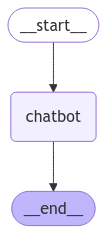

In [5]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"messages": ["Hi", "myself is laxmi kant"]})


{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='aea06c53-e3f6-41a9-9859-8ed4f9227c4d'),
  HumanMessage(content='myself is laxmi kant', additional_kwargs={}, response_metadata={}, id='73a0c966-28d1-43e5-a485-76b822349405'),
  AIMessage(content="Namaste Laxmi Kant! It's a pleasure to meet you. I don't have any information about your personal life or background, so feel free to share with me if you'd like. Are you interested in discussing something specific or just chatting?", additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-02-01T16:44:46.985359468Z', 'done': True, 'done_reason': 'stop', 'total_duration': 5592434097, 'load_duration': 3663955729, 'prompt_eval_count': 34, 'prompt_eval_duration': 281000000, 'eval_count': 52, 'eval_duration': 521000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-672321a4-aa5e-42b4-9c88-2c75eac88854-0', usage_metadata={'input_tokens': 34,

In [7]:
graph.invoke({"messages": ["Hello"]})


{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='2605cd62-ed02-44cd-9486-44d93376f8b9'),
  AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-02-01T16:47:10.958525871Z', 'done': True, 'done_reason': 'stop', 'total_duration': 136040477, 'load_duration': 29976816, 'prompt_eval_count': 26, 'prompt_eval_duration': 28000000, 'eval_count': 8, 'eval_duration': 76000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-9c818c5d-0bd0-4793-89dd-64980486d28f-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})]}

In [ ]:
while True:
    user_input = input("You: ")
    if user_input in ['q', 'quit', 'exit']:
        print("Bye!")
        break

    response = graph.invoke({"messages": [user_input]})
    print("Assistant:", response["messages"][-1].content)

Assistant: How can I assist you today?
Assistant: I can assist with a wide range of math problems. What type of math are you working on? Do you have a specific problem or topic in mind that you'd like help with?

Here are some areas I can provide assistance with:

1. **Algebra**: Equations, inequalities, systems of equations, quadratic equations, etc.
2. **Geometry**: Points, lines, angles, triangles, quadrilaterals, polygons, circles, 3D geometry, etc.
3. **Trigonometry**: Angles, triangles, waves, circular functions (sine, cosine, tangent), etc.
4. **Calculus**: Limits, derivatives, integrals, multivariable calculus, differential equations, etc.
5. **Statistics and Probability**: Descriptive statistics, inferential statistics, probability distributions, Bayes' theorem, etc.
6. **Number Theory**: Properties of numbers (even/odd, prime, composite), divisibility, modular arithmetic, Diophantine equations, etc.

Let me know what you're working on, and I'll do my best to help!
Assistant: 

[('User', 'Xin chào!'), ('AI', "Xin chào! (Hello!) Welcome to our conversation. I'm here to help you with any questions or topics you'd like to discuss. How are you today?")]


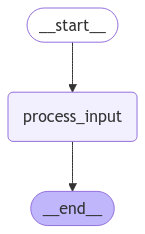

In [19]:
import os
from langchain_ollama import ChatOllama


from langchain.memory import ConversationBufferMemory
from langgraph.graph import StateGraph, END
from typing import TypedDict

# Thiết lập API key cho OpenAI
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"

# 1. Định nghĩa state (trạng thái) của chatbot
class ChatbotState(TypedDict):
    chat_history: list  # Bộ nhớ lưu trữ lịch sử hội thoại
    user_input: str     # Tin nhắn của người dùng

# 2. Node xử lý tin nhắn của người dùng
def process_user_input(state: ChatbotState):
    """Nhận tin nhắn người dùng và gửi tới mô hình AI."""
    user_input = state["user_input"]
    chat_history = state["chat_history"]
    
    llm = ChatOllama(model="llama3.2:3b", base_url = "http://localhost:11434")

    response = llm.invoke(user_input)
    
    # Cập nhật lịch sử hội thoại
    chat_history.append(("User", user_input))
    chat_history.append(("AI", response.content))
    
    return {"chat_history": chat_history}

# 3. Xây dựng đồ thị LangGraph
workflow = StateGraph(ChatbotState)
workflow.add_node("process_input", process_user_input)  # Thêm node xử lý
workflow.set_entry_point("process_input")  # Điểm bắt đầu
workflow.add_edge("process_input", END)  # Kết thúc workflow

graph = workflow.compile()

# 4. Chạy thử chatbot
chat_state = {"chat_history": [], "user_input": "Xin chào!"}
output = graph.invoke(chat_state)

# In kết quả
print(output["chat_history"])

from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

# Enhancing the chatbot with tools

In [11]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults

# Đặt API key vào biến môi trường
os.environ["TAVILY_API_KEY"] = "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"

# Khởi tạo công cụ tìm kiếm
tool = TavilySearchResults(max_results=2)

# Gọi tìm kiếm
result = tool.invoke("What's a 'node' in LangGraph?")

# In kết quả
print(result)


[{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/', 'content': "LangGraph's underlying graph algorithm uses message passing to define a general program. When a Node completes its operation, it sends messages along one or more edges to other node (s). These recipient nodes then execute their functions, pass the resulting messages to the next set of nodes, and the process continues."}, {'url': 'https://medium.com/@vivekvjnk/langgraph-basics-understanding-state-schema-nodes-and-edges-77f2fd17cae5', 'content': 'LangGraph Basics: Understanding State, Schema, Nodes, and Edges | by Story_Teller | Dec, 2024 | Medium LangGraph Basics: Understanding State, Schema, Nodes, and Edges LangGraph Basics: Understanding State, Schema, Nodes, and Edges These predefined structures in the messaging app are synonymous with the schema of the state in LangGraph. Just as a messaging app ensures all interactions (messages) follow a consistent format, the schema in LangGraph ensures the stat

In [2]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition

from langchain_core.messages import HumanMessage
from langchain_core.tools import tool
from typing import Annotated, TypedDict 
from langgraph.graph import  StateGraph, START, END

from langgraph.graph.message import add_messages 

from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:3b", base_url = "http://localhost:11434")
@tool
def internet_search(query: str):
    """
    Search the web for realtime and latest information.
    for examples, news, stock market, weather updates etc.
    
    Args:
    query: The search query
    """
    search = TavilySearchResults(
        max_results=3,
        search_depth='advanced',
        include_answer=True,
        include_raw_content=True,
    )

    response = search.invoke(query)

    return response

@tool
def llm_search(query: str):
    """
    Use the LLM model for general and basic information.
    """
    response = llm.invoke(query)
    return response

In [12]:
tools = [internet_search, llm_search]
tools

[StructuredTool(name='internet_search', description='Search the web for realtime and latest information.\nfor examples, news, stock market, weather updates etc.\n\nArgs:\nquery: The search query', args_schema=<class 'langchain_core.utils.pydantic.internet_search'>, func=<function internet_search at 0x7f45cf7f15a0>),
 StructuredTool(name='llm_search', description='Use the LLM model for general and basic information.', args_schema=<class 'langchain_core.utils.pydantic.llm_search'>, func=<function llm_search at 0x7f45cf3831c0>)]

In [13]:
llm_with_tools = llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatOllama(model='llama3.2:3b', base_url='http://localhost:11434'), kwargs={'tools': [{'type': 'function', 'function': {'name': 'internet_search', 'description': 'Search the web for realtime and latest information.\nfor examples, news, stock market, weather updates etc.\n\nArgs:\nquery: The search query', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'llm_search', 'description': 'Use the LLM model for general and basic information.', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [15]:
class State(TypedDict):
    # {"messages": ["your message"]}
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": [response]}

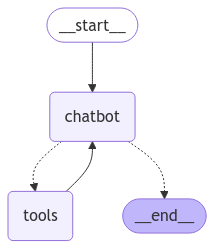

In [16]:
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import display, Image

memory = MemorySaver()

graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges("chatbot", tools_condition)

graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

graph = graph_builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
config = {"configurable": {"thread_id": 1}}
output = graph.invoke({"messages": ["Tell me about the earth in 3 points"]}, config=config)
output

{'messages': [HumanMessage(content='Tell me about the earth in 3 points', additional_kwargs={}, response_metadata={}, id='441be90b-aaf2-49b3-8831-c9ee42d06292'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-02-04T16:50:02.29765453Z', 'done': True, 'done_reason': 'stop', 'total_duration': 4290722440, 'load_duration': 3802543208, 'prompt_eval_count': 236, 'prompt_eval_duration': 264000000, 'eval_count': 22, 'eval_duration': 221000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-32395af6-3e53-4e32-a460-dbe0e3e68575-0', tool_calls=[{'name': 'llm_search', 'args': {'query': 'earth facts three key points'}, 'id': 'c50be423-5585-456c-b721-8e5fc711ce8b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 236, 'output_tokens': 22, 'total_tokens': 258}),
  ToolMessage(content='content="Here are three key points about Earth:\\n\\n1. **Age and Formation**: The Earth is approximately 4.54

# Testing the chatbot

In [1]:
from langchain_ollama import ChatOllama

model = "llama3.2:3b"
llm = ChatOllama(model=model, base_url="http://localhost:11434")
print(llm.invoke("Hello, how are you?"))

content="I'm just a language model, so I don't have feelings or emotions like humans do. However, I'm functioning properly and ready to help with any questions or tasks you may have! How can I assist you today?" additional_kwargs={} response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-02-05T16:28:39.365128576Z', 'done': True, 'done_reason': 'stop', 'total_duration': 4559375999, 'load_duration': 3803448885, 'prompt_eval_count': 31, 'prompt_eval_duration': 258000000, 'eval_count': 46, 'eval_duration': 495000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)} id='run-f50190c3-29e4-4dbc-90c0-f6d78f2bdf86-0' usage_metadata={'input_tokens': 31, 'output_tokens': 46, 'total_tokens': 77}


In [2]:
from langchain_ollama import OllamaEmbeddings
import faiss
from langchain_community.vectorstores import FAISS 
from langchain_community.docstore.in_memory import InMemoryDocstore


embeddings = OllamaEmbeddings(
    model="nomic-embed-text",
    base_url='http://localhost:11434'
)

db_name = "health_supplements"
vector_store = FAISS.load_local(db_name, embeddings, allow_dangerous_deserialization=True)

retriever = vector_store.as_retriever(search_type="similarity", search_kwargs = {'k': 5})

question = "how to gain muscle mass?"
retriever.invoke(question)

[Document(metadata={'source': 'rag-dataset\\gym supplements\\2. High Prevalence of Supplement Intake.pdf', 'file_path': 'rag-dataset\\gym supplements\\2. High Prevalence of Supplement Intake.pdf', 'page': 8, 'total_pages': 11, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': 'iLovePDF', 'creationDate': '', 'modDate': 'D:20241021113904Z', 'trapped': ''}, page_content='and strength gain among men. We detected more prevalent protein and creatine supplementation\namong younger compared to older ﬁtness center users, whereas the opposite was found for vitamin\nsupplementation. Other authors made similar observations [23] and it might reﬂect the diﬀerent\ntraining goals among age groups, i.e., more focus on strength and muscles among the younger and\nmore focus on health among the older age groups.\nComparable to other studies [4], we detected a positive correlation between training frequency\nand supplement usage. Nevertheless, the cor

In [3]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "health_supplements",
    "Search and retrun information about the Health Supplements for workout and gym",
)

tools = [retriever_tool]
print(tools)

[Tool(name='health_supplements', description='Search and retrun information about the Health Supplements for workout and gym', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x7f6bc8cd2c20>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7f6b195cc550>, search_kwargs={'k': 5}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n'), coroutine=functools.partial(<function _aget_relevant_documents at 0x7f6bc8c6c4c0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7f6b195cc550>, search_kwargs={'k': 5}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), 

In [4]:
from typing import Annotated, Sequence, TypedDict, Literal 
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [6]:
from langchain import hub
from langchain_core.messages import  BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field
from langgraph.prebuilt import tools_condition

In [7]:
def grade_documents(state: State):
    class grade(BaseModel):
        binary_score: str = Field(description="The grade of the document")
    
    llm_with_structured_output = llm.with_structured_output(grade)
    
    prompt = PromptTemplate(
        template = """
            You are a grader assessing relevance of a document to a user question. \n
            Here is the retrived document: \n\n {context} \n\n
            Here is the user question:  {question} \n
            If the document contains keywords or semantic meaing related to the user question, grade it as relevant. \n
            Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
        """,
        input_variables=['context', 'question']
    )
    chain = prompt | llm_with_structured_output
    
    message = state["messages"]
    last_message = message[-1]
    
    question = message[0].content
    docs = last_message.content
    
    score_result = chain.invoke({"context": docs, "question": question})
    score = score_result.binary_score    
    if score == "yes":
        return "generate"
    else:
        return "rewrite"

In [8]:
def agent(state):
    message = state["messages"]
    
    llm_with_tools = llm.bind_tools(tools, tool_choice="required")
    response = llm_with_tools.invoke(message)
    return {"messages": [response]}

In [9]:
def rewrite(state):
    message = state["messages"]
    question = message[0].content
    
    msg = [
        HumanMessage(
            content = f"""\n
            Look at the input and try to reason about the underlying semantic intent meaning. \n
            Here is the initial question:
            \n {question} \n
            Formulate an improved question
            """
        )
    ]
    response = llm.invoke(msg)
    return {"messages": [response]}


In [10]:
def generate(state):
    message = state["messages"]
    question = message[0].content
    last_message = message[-1]
    docs = last_message.content
    
    prompt = hub.pull("rlm/rag-prompt") 
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    rag_chain = prompt | llm | StrOutputParser()
   
    response = rag_chain.invoke({"question": question, "context": docs})
    return {"messages": [response]}

In [11]:
from langgraph.graph import END, START, StateGraph
from langgraph.prebuilt import ToolNode

In [12]:
graph_builder = StateGraph(State)

graph_builder.add_node("agent", agent)
retriever = ToolNode([retriever_tool])
graph_builder.add_node("retriever", retriever)
graph_builder.add_node("rewrite", rewrite)
graph_builder.add_node("generate", generate)

graph_builder.add_edge(START, "agent")
graph_builder.add_conditional_edges("agent", tools_condition, {"tools": "retriever", END:END})
graph_builder.add_conditional_edges("retriever", grade_documents)
graph_builder.add_edge("generate", END)
graph_builder.add_edge("rewrite", "agent")

graph = graph_builder.compile()

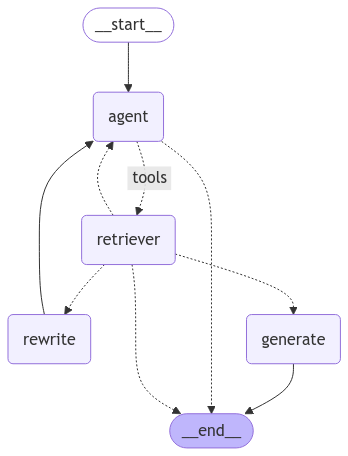

In [13]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
from pprint import pprint

# query = {"messages": [HumanMessage("How to gain muscle mass?")]}
query = {"messages": [HumanMessage("what are the risks of taking too much protein?")]}

# query = {"messages": [HumanMessage("tell me about the langchain")]}

# graph.invoke(query)

for output in graph.stream(query):
    for key, value in output.items():
        pprint(f"Output from node '{key}':")
        pprint("----")
        pprint(value, indent=4, width=120)

    pprint("\n------\n")

"Output from node 'agent':"
'----'
{   'messages': [   AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-02-05T16:34:35.632157908Z', 'done': True, 'done_reason': 'stop', 'total_duration': 337543506, 'load_duration': 31718343, 'prompt_eval_count': 177, 'prompt_eval_duration': 14000000, 'eval_count': 24, 'eval_duration': 290000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-a5a8a93d-635c-432a-a7bb-33b6524003ca-0', tool_calls=[{'name': 'health_supplements', 'args': {'query': 'risks of taking too much protein'}, 'id': '47c9effa-9149-4a7d-9dbe-03da32e530ba', 'type': 'tool_call'}], usage_metadata={'input_tokens': 177, 'output_tokens': 24, 'total_tokens': 201})]}
'\n------\n'
"Output from node 'retriever':"
'----'
{   'messages': [   ToolMessage(content='liver oils which also contain vitamin A and multivitamin supplements could result in \nhypervitaminosis A. Furthermore, fish oils and omega

/home/namnh1/miniconda3/envs/rag/lib/python3.10/site-packages/langsmith/client.py:261: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


"Output from node 'generate':"
'----'
{   'messages': [   'Taking too much protein can lead to ketosis, a metabolic state where the body breaks down fat for '
                    'energy instead of carbohydrates. Excessive protein intake may also exacerbate kidney problems in '
                    'individuals with pre-existing kidney issues. Additionally, some protein supplements have been '
                    'linked to liver toxicity and hyperchromatosis, an iron storage disease associated with liver '
                    'injury.']}
'\n------\n'
